# Distribution Approach
Interferometry tracks the ToF, giving us an intensity distribution over time. Assuming the refractive indices are similar across the entire tissue structure/body, photon total path ($\sum_{i=1}^{T}L_i$; with T being the number of tissue layers) can be a proxy for time. (If the refractive indices are different, we need to calculate the speed of light in each tissue layer/medium separately and then calculate the actual ToF for each photon. Although that approach is tractable in our setup, it's simpler to assume the speed of light remains constant for now.) So, the simulation plots we are interested in are Intensity($<G, A>$) vs. Photon total path($\sum_{i=1}^{T}L_i$)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from inverse_modelling_tfo.tools.name_decoder import decode_extended_filename
from ipywidgets import interact
import ipywidgets as widgets
from tfo_sensitivity.data import load_raw
from inverse_modelling_tfo.tools.s_based_intensity_datagen import MU_MAP_BASE1, MU_MAP_BASE2, get_mu_a
from tfo_sensitivity.calculate_intensity import create_quantized_tof_const_res, generate_intensity_column

# Pre-calculated intensity using the regular formula (inner product)
# INTENSITY_DATA_PATH = Path('../data/s_based_intensity_low_conc2.pkl')

# intensity_data = pd.read_pickle(INTENSITY_DATA_PATH)
# intensity_data = intensity_data[(intensity_data['Maternal Wall Thickness'] == maternal_wall_thickness) & (intensity_data['Wave Int'] == wave_int)]

# plt.rcParams['figure.dpi'] = 150    # Smaller plot
plt.rcParams['figure.dpi'] = 700    # Paper-ready plots


maternal_wall_thickness, uterus_thickness, wave_int = 4, 5, 2
raw_sim_data_path = load_raw(maternal_wall_thickness, uterus_thickness, wave_int)
raw_sim_data = pd.read_pickle(raw_sim_data_path)
# Create SDD column!
raw_sim_data['SDD'] = raw_sim_data['X'] - 100
SPEED_OF_LIGHT = 3e8 / 1.4

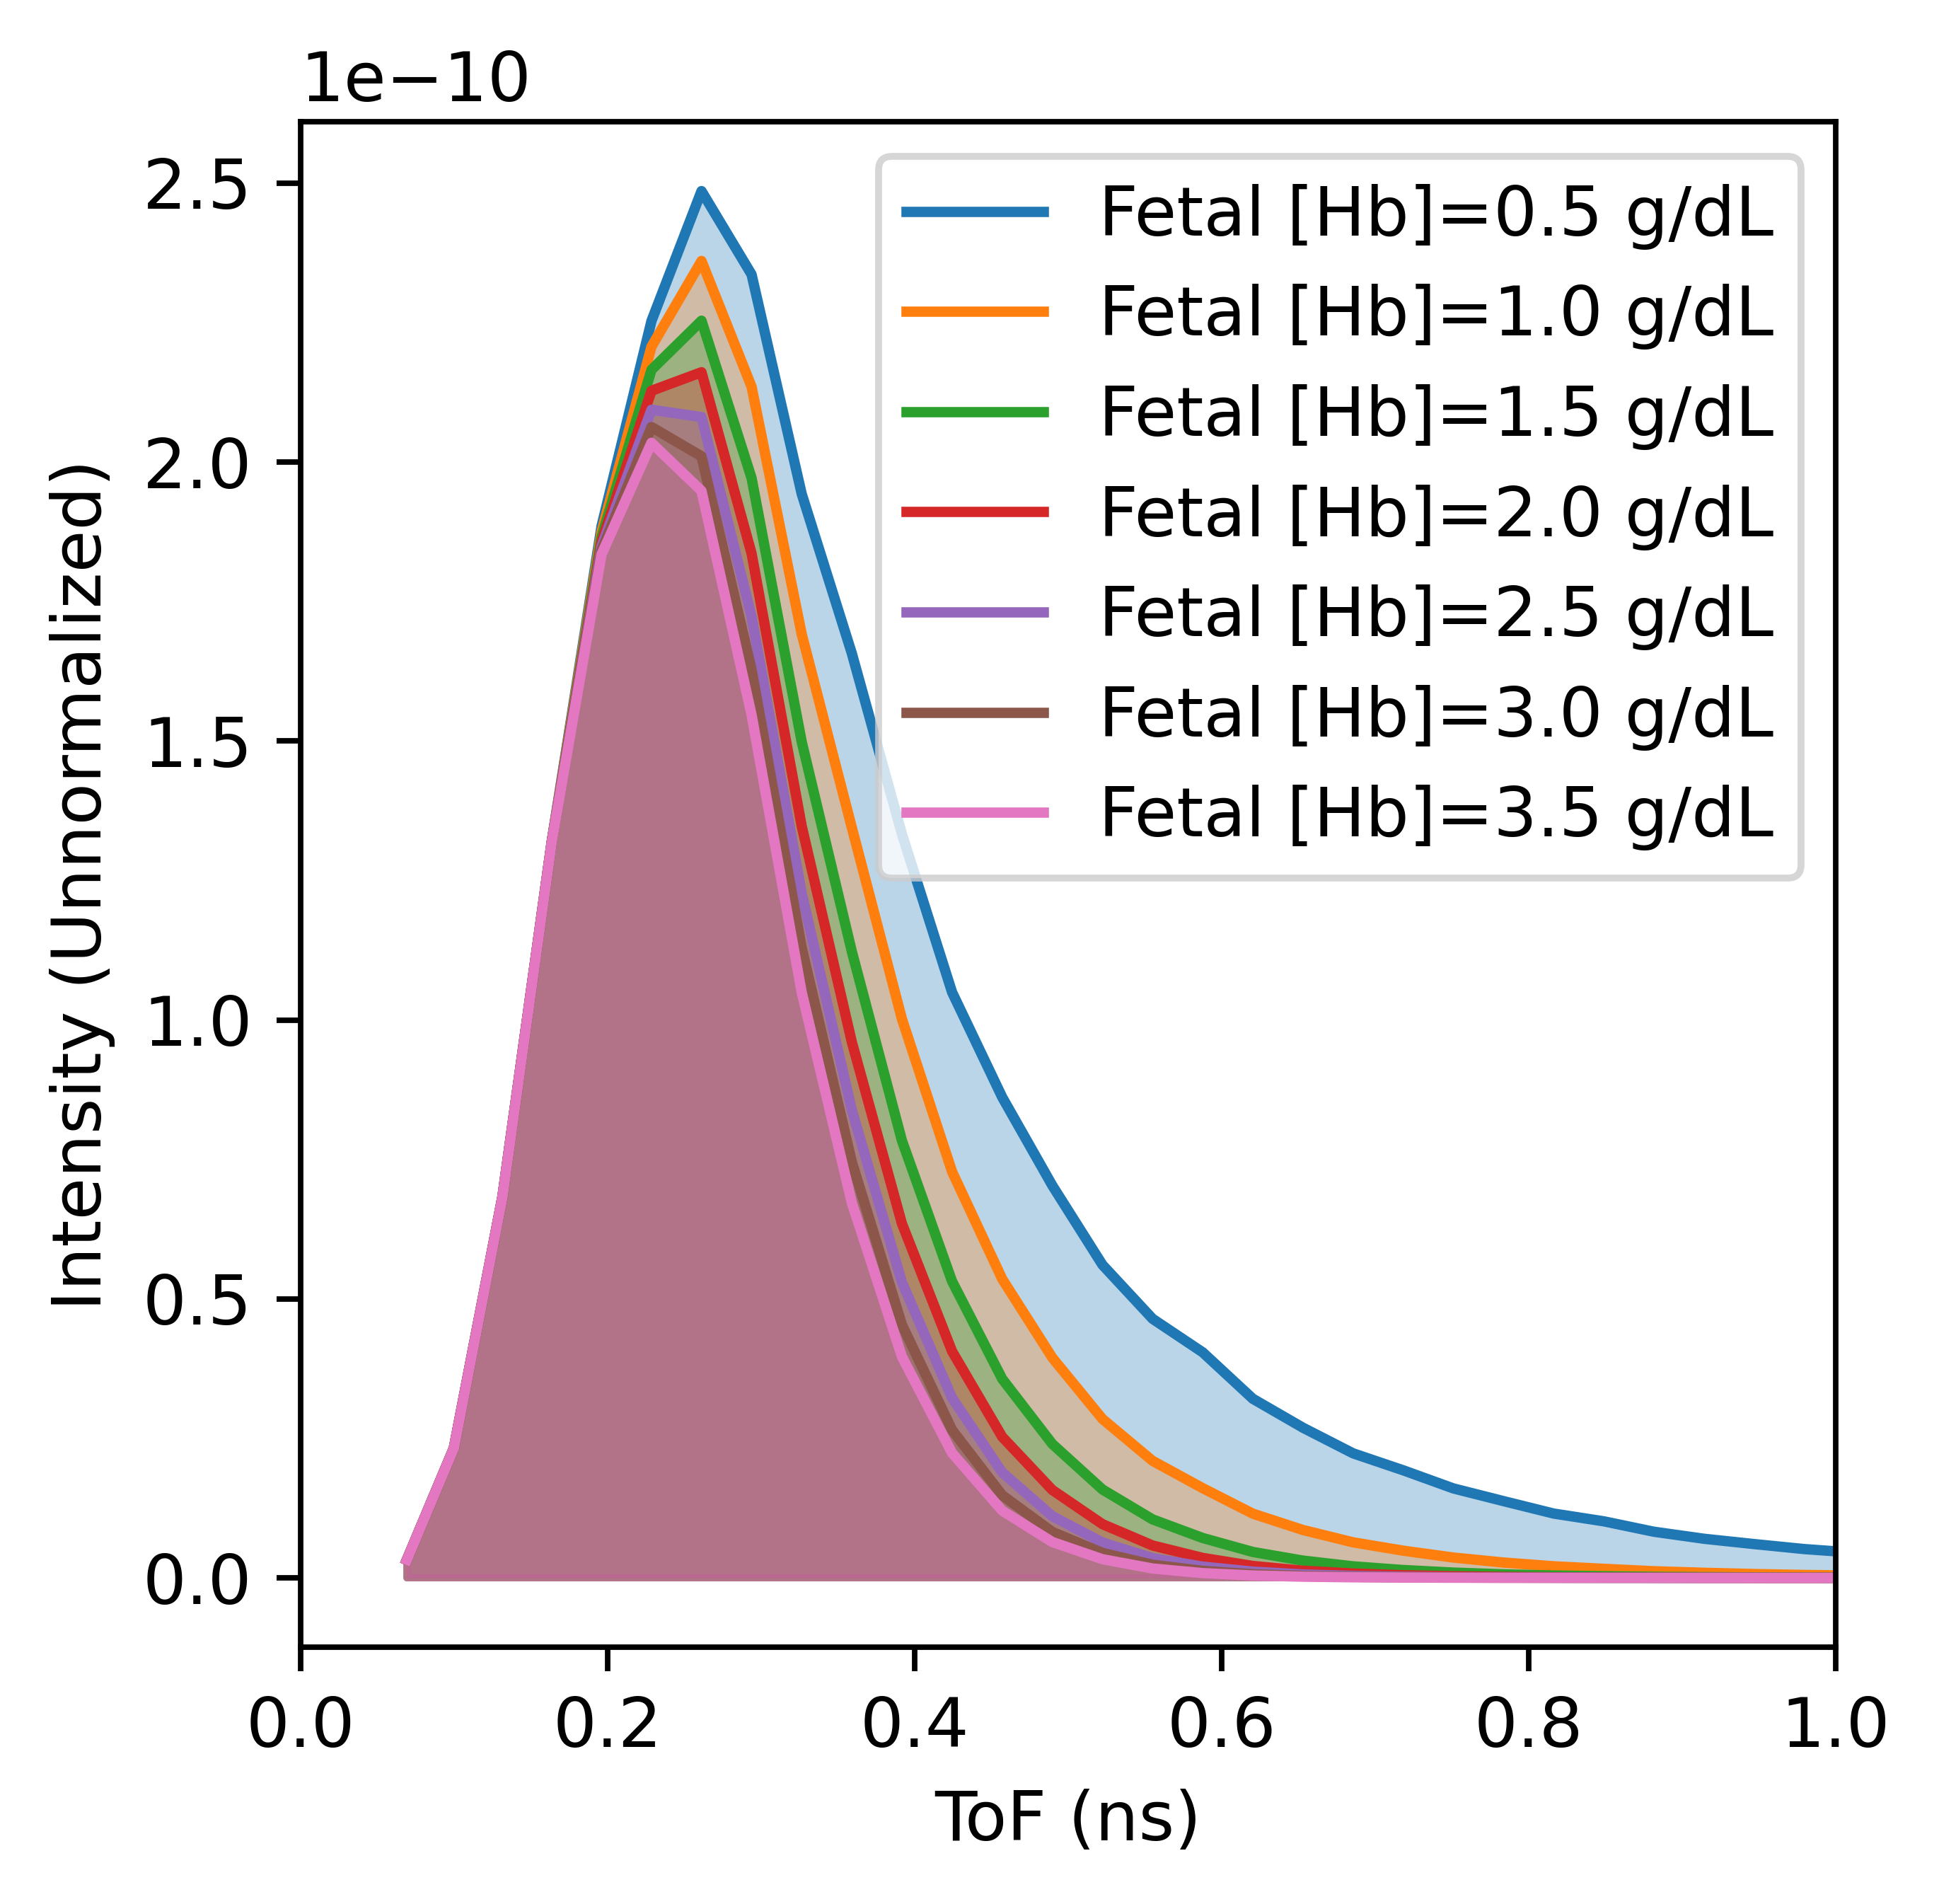

In [2]:
DIGITIZATION_BIN_COUNT = 200
TIME_RESOLUTION = 7.

SDD_INDEX = 3

MATERNAL_Hb = 5.
MATERNAL_SAT = 1.0
FETAL_SAT = 0.225

all_mean = []
all_skew = []
all_std = []
all_c = np.arange(0.5, stop=4, step=0.5)
modified_mu_map = MU_MAP_BASE1.copy() if wave_int == 1 else MU_MAP_BASE2
modified_mu_map[1] = get_mu_a(MATERNAL_SAT, MATERNAL_Hb, wave_int)
epsilon = get_mu_a(FETAL_SAT, 1, wave_int) 
all_sdd = raw_sim_data['SDD'].unique()

plt.figure(figsize=(4, 4))
for c in all_c:
    SDD = all_sdd[SDD_INDEX]
    filtered_photon_data = raw_sim_data[raw_sim_data['SDD'] == SDD].copy()
    create_quantized_tof_const_res(filtered_photon_data, TIME_RESOLUTION)
    modified_mu_map[4] = get_mu_a(FETAL_SAT, c, wave_int)
    filtered_photon_data["Intensity"] = generate_intensity_column(filtered_photon_data, modified_mu_map, SDD_INDEX)
    filtered_photon_data["ToF"] *= 1e6 / SPEED_OF_LIGHT
    intensity_v_L = filtered_photon_data.groupby("ToF")["Intensity"].sum()
    line, = plt.plot(intensity_v_L, label=f'Fetal [Hb]={c} g/dL')
    plt.fill_between(intensity_v_L.index, intensity_v_L, color=line.get_color(), alpha=0.3)

plt.legend()
plt.xlabel('ToF (ns)')
plt.ylabel('Intensity (Unnormalized)')
plt.xlim([0, 1.0])

plt.show()

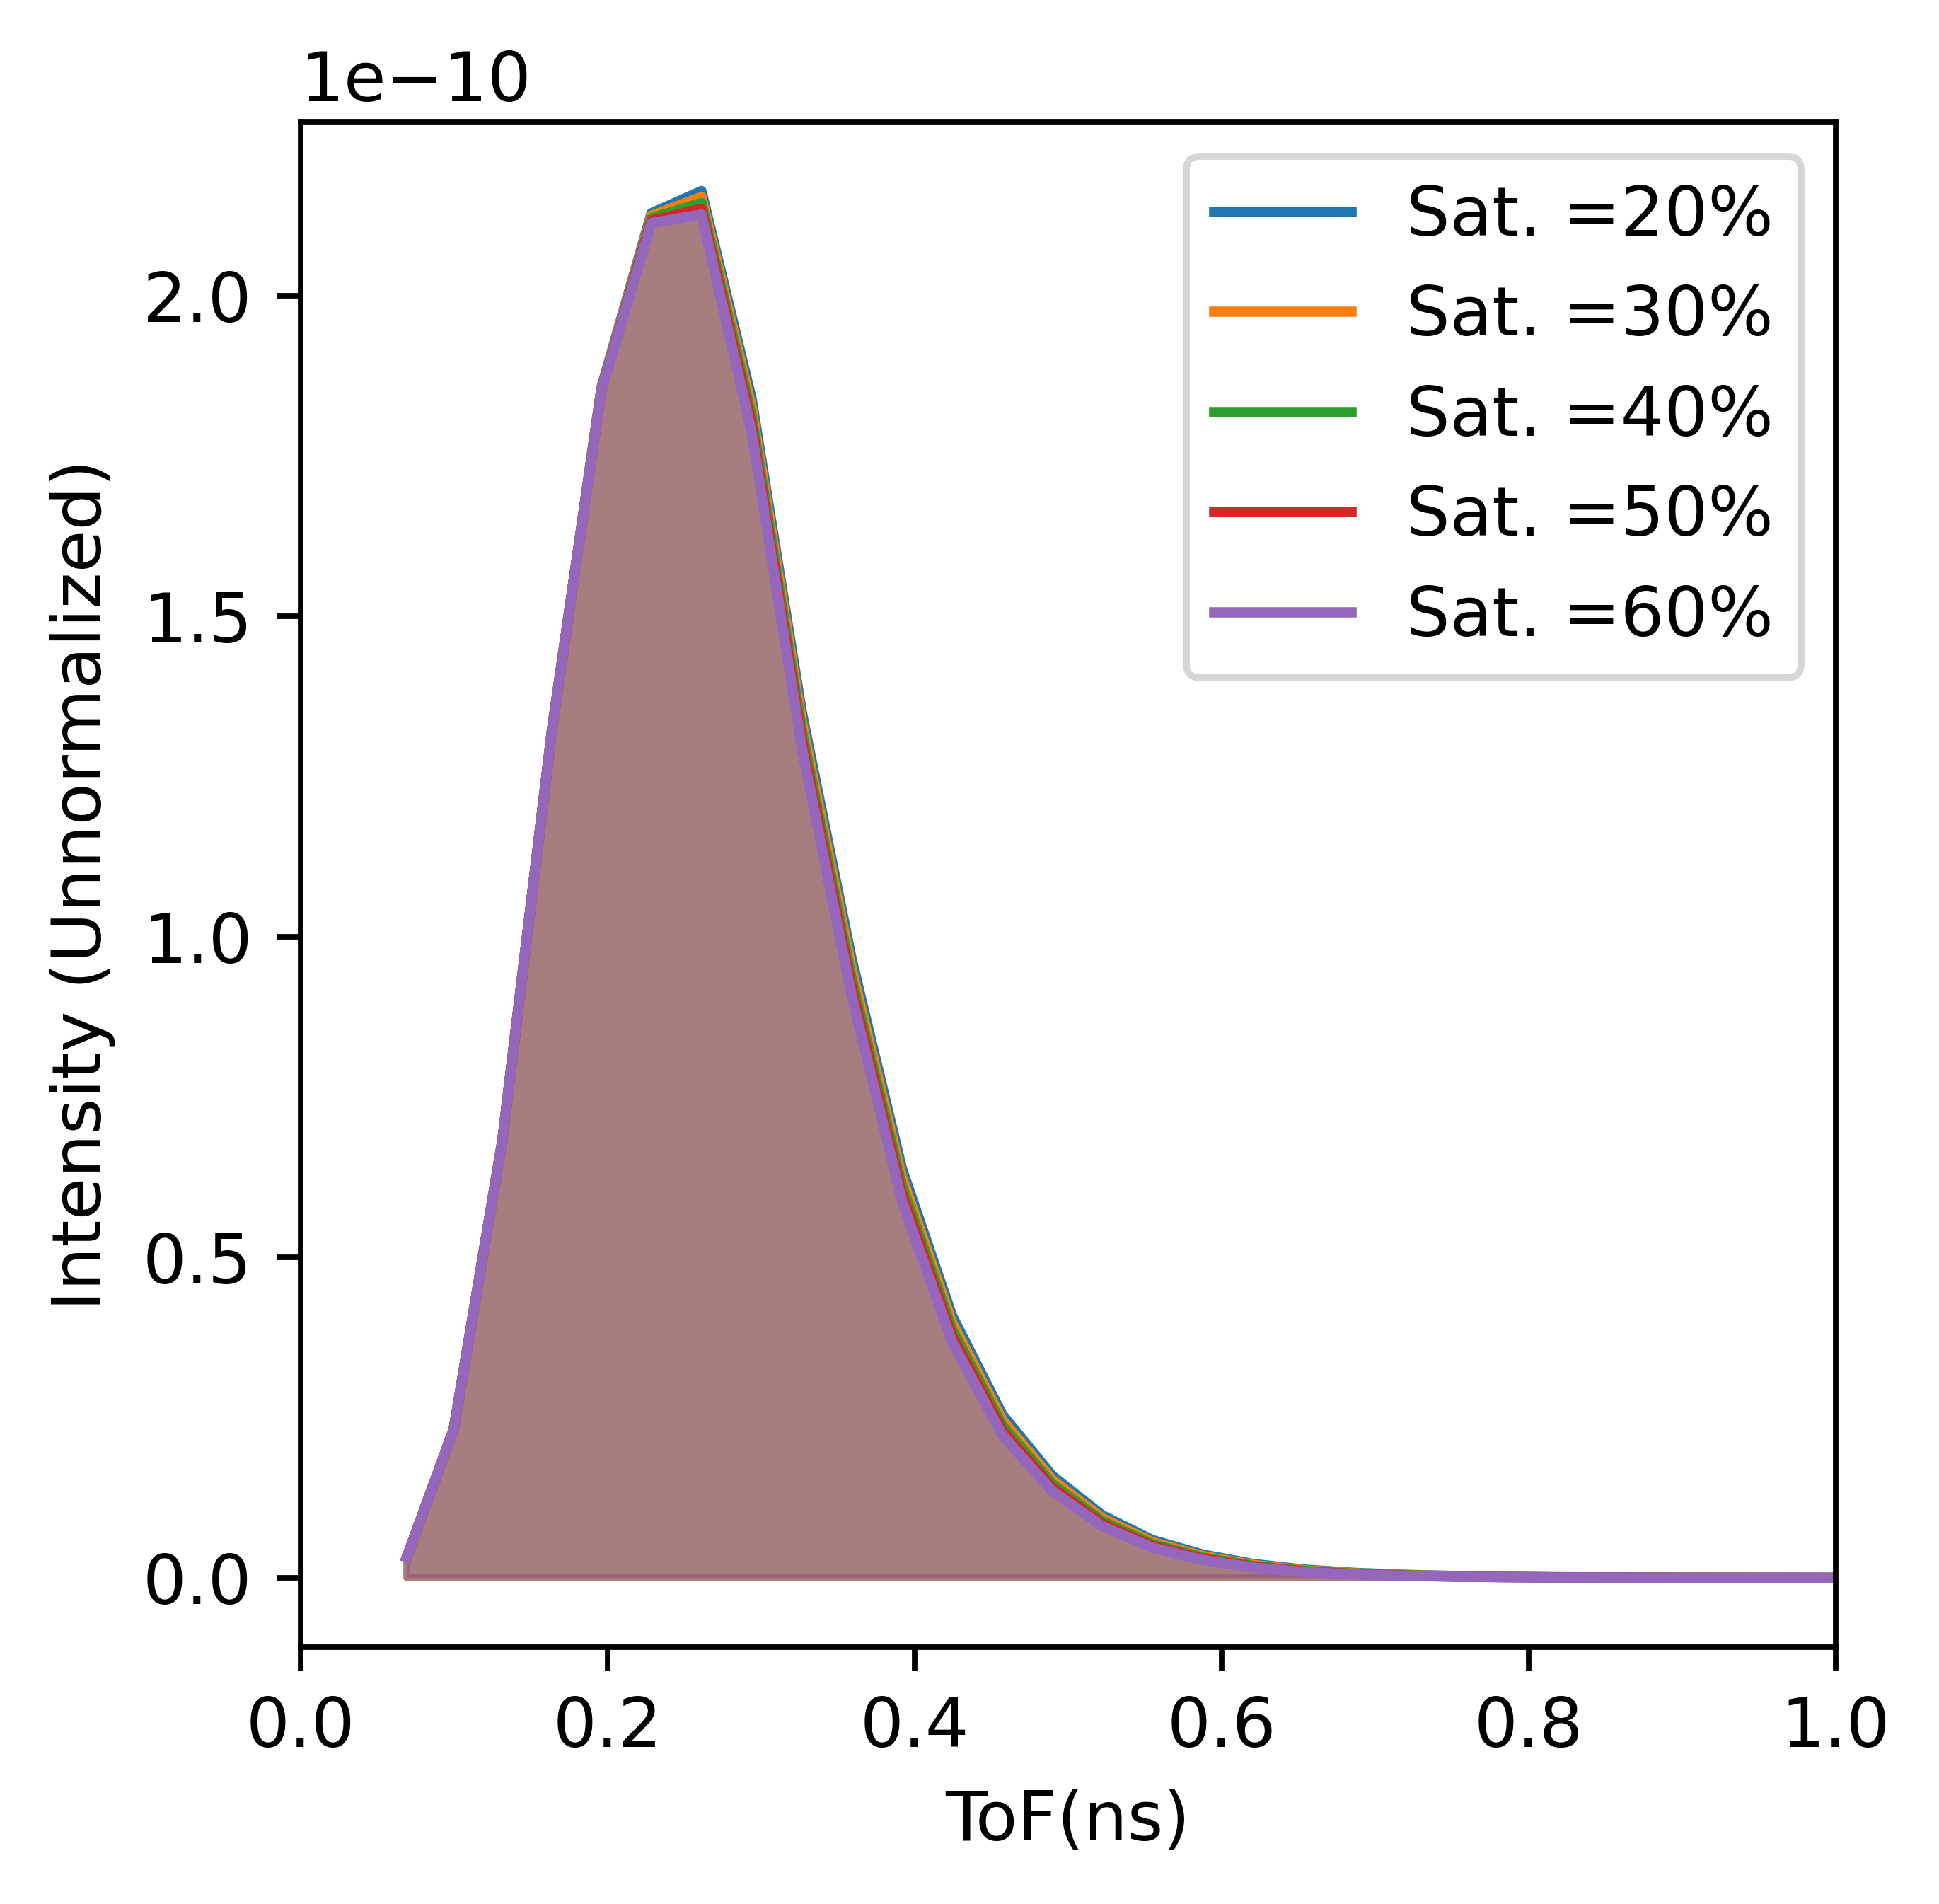

In [5]:
DIGITIZATION_BIN_COUNT = 200

SDD_INDEX = 3

MATERNAL_Hb = 5.
MATERNAL_SAT = 1.0
FETAL_Hb = 2.0

all_mean = []
all_skew = []
all_std = []
all_sat = np.arange(0.2, stop=0.7, step=0.1)
modified_mu_map = MU_MAP_BASE1.copy() if wave_int == 1 else MU_MAP_BASE2
modified_mu_map[1] = get_mu_a(MATERNAL_SAT, MATERNAL_Hb, wave_int)
all_sdd = raw_sim_data['SDD'].unique()

plt.figure(figsize=(4, 4))
for sat in all_sat:
    SDD = all_sdd[SDD_INDEX]
    filtered_photon_data = raw_sim_data[raw_sim_data['SDD'] == SDD].copy()
    create_quantized_tof_const_res(filtered_photon_data, TIME_RESOLUTION)
    modified_mu_map[4] = get_mu_a(sat, FETAL_Hb, wave_int)
    filtered_photon_data["Intensity"] = generate_intensity_column(filtered_photon_data, modified_mu_map, SDD_INDEX)
    filtered_photon_data["ToF"] *= 1e6 / SPEED_OF_LIGHT
    intensity_v_L = filtered_photon_data.groupby("ToF")["Intensity"].sum()
    line, = plt.plot(intensity_v_L, label=f'Sat. ={sat * 100:2.0f}%')
    plt.fill_between(intensity_v_L.index, intensity_v_L, color=line.get_color(), alpha=0.3)

plt.legend()
plt.xlabel('ToF(ns)')
plt.ylabel('Intensity (Unnormalized)')
plt.xlim([0, 1.0])
# plt.xlim([0, 2.0])

plt.show()

In [4]:
# MATERNAL_Hb = 5.
# MATERNAL_SAT = 1.0
# FETAL_Hb = 5.0
# FETAL_SAT = 0.4

# all_mean = []
# all_skew = []
# all_std = []
# all_dets = np.arange(2, 7, step=1)
# modified_mu_map = MU_MAP_BASE1.copy() if wave_int == 1 else MU_MAP_BASE2
# modified_mu_map[1] = get_mu_a(MATERNAL_SAT, MATERNAL_Hb, wave_int)
# modified_mu_map[4] = get_mu_a(FETAL_SAT, FETAL_Hb, wave_int)
# all_sdd = raw_sim_data['SDD'].unique()

# plt.figure(figsize=(4, 4))
# for det_index in all_dets:
#     SDD = all_sdd[det_index]
#     filtered_photon_data = raw_sim_data[raw_sim_data['SDD'] == SDD].copy()
#     create_quantized_tof_const_res(filtered_photon_data, TIME_RESOLUTION)
#     filtered_photon_data["Intensity"] = generate_intensity_column(filtered_photon_data, modified_mu_map, det_index)
#     intensity_v_L = filtered_photon_data.groupby("ToF")["Intensity"].sum()
#     # intensity_v_L /= intensity_v_L.sum()
#     line, = plt.plot(intensity_v_L, label=f'SDD ={SDD/10:2.1f}cm')
#     plt.fill_between(intensity_v_L.index, intensity_v_L, color=line.get_color(), alpha=0.3)

# plt.legend()
# plt.xlabel('ToF(mm/speed of light)')
# plt.ylabel('Intensity (Unnormalized)')
# # plt.xlim([0, 300])
# plt.xlim([0, 700])
# # plt.yscale('log')
# plt.show()